# NYC Crash Data Analysis
This project studies the [Motor-Vehicle-Collisions-Crashes](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95) data to find patterns in the data by visualizing it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs

In [2]:
# please proceed onlyafter changing root directory and input file name

# Config for the project
root_dir = 'G:\Projects\\NYC-Crash-Data-Analytics\\'
# Input filename
filename = 'G:\Projects\\NYC-Crash-Data-Analytics\Motor_Vehicle_Collisions_-_Crashes.csv'
# Cleaned filename
clean_filename = 'G:\Projects\\NYC-Crash-Data-Analytics\Motor_Vehicle_Collisions_-_Crashes_Cleaned.csv'
# NY Borough Boundaries shapefile
nybb_shapefile = root_dir + 'maps\nybb.shp'
# Index column

index_col = 'COLLISION_ID'

## Data Cleaning
The data cleaning involved the following processes:
* **Date Parsing:** The data has two fields for CRASH DATE and CRASH TIME. We combined these two fields into a DATETIME field to make filtering easier for the data investigation.
* **NA Value Filling:** The data contains NA values, to have a more consistent data, we filled the NA values depending on the type of data in the field. For example, the NA values in the BOROUGH field were filled with 'UNKOWN', the LATITUDE/LONGITUDE fields were set to 0.

In [3]:
# Data types for the columns in the data
dtypes = {
    'CRASH DATE' : 'str',
    'CRASH TIME' : 'str',
    'BOROUGH' : 'str',
    'ZIP CODE' : 'str',
    'LATITUDE' : 'float64',
    'LONGITUDE' : 'float64',
    'LOCATION' : 'object',
    'ON STREET NAME' : 'str',
    'CROSS STREET NAME' : 'str',
    'OFF STREET NAME' : 'str',
    'NUMBER OF PERSONS INJURED' : 'float64',
    'NUMBER OF PERSONS KILLED' : 'float64',
    'NUMBER OF PEDESTRIANS INJURED' : 'float64',
    'NUMBER OF PEDESTRIANS KILLED' : 'float64',
    'NUMBER OF CYCLIST INJURED' : 'float64',
    'NUMBER OF CYCLIST KILLED' : 'float64',
    'NUMBER OF MOTORIST INJURED' : 'float64',
    'NUMBER OF MOTORIST KILLED' : 'float64',
    'CONTRIBUTING FACTOR VEHICLE 1' : 'str',
    'CONTRIBUTING FACTOR VEHICLE 2' : 'str',
    'CONTRIBUTING FACTOR VEHICLE 3' : 'str',
    'CONTRIBUTING FACTOR VEHICLE 4' : 'str',
    'CONTRIBUTING FACTOR VEHICLE 5' : 'str',
    'COLLISION_ID' : 'int64',
    'VEHICLE TYPE CODE 1' : 'category',
    'VEHICLE TYPE CODE 2' : 'category',
    'VEHICLE TYPE CODE 3' : 'category',
    'VEHICLE TYPE CODE 4' : 'category',
    'VEHICLE TYPE CODE 5' : 'category'
}

# Column-wise replacement values for NA
na_replace = {
    'BOROUGH' : 'UNKNOWN',
    'ZIP CODE' : 'UNKNOWN',
    'LATITUDE' : 0,
    'LONGITUDE' : 0,
    'LOCATION' : '(0.0, 0.0)',
    'ON STREET NAME' : '',
    'CROSS STREET NAME' : '',
    'OFF STREET NAME' : '',
    'NUMBER OF PERSONS INJURED' : 0,
    'NUMBER OF PERSONS KILLED' : 0,
    'NUMBER OF PEDESTRIANS INJURED' : 0,
    'NUMBER OF PEDESTRIANS KILLED' : 0,
    'NUMBER OF CYCLIST INJURED' : 0,
    'NUMBER OF CYCLIST KILLED' : 0,
    'NUMBER OF MOTORIST INJURED' : 0,
    'NUMBER OF MOTORIST KILLED' : 0,
    'CONTRIBUTING FACTOR VEHICLE 1' : '',
    'CONTRIBUTING FACTOR VEHICLE 2' : '',
    'CONTRIBUTING FACTOR VEHICLE 3' : '',
    'CONTRIBUTING FACTOR VEHICLE 4' : '',
    'CONTRIBUTING FACTOR VEHICLE 5' : '',
    'VEHICLE TYPE CODE 1' : '',
    'VEHICLE TYPE CODE 2' : '',
    'VEHICLE TYPE CODE 3' : '',
    'VEHICLE TYPE CODE 4' : '',
    'VEHICLE TYPE CODE 5' : ''
}

print('Reading CSV file %s ...' % filename)

crash_data = pd.read_csv(filename, 
        index_col=index_col,
        dtype=dtypes,
        parse_dates={'CRASH DATETIME' : ['CRASH DATE', 'CRASH TIME']},
        infer_datetime_format=True
    )

print('Filling NaN values ...')
for key, val in na_replace.items():
    print('\t%s' % key)
    crash_data[key] = crash_data[key].replace(np.nan, val)

print("Saving cleaned file to %s ..." % clean_filename)
crash_data.to_csv(clean_filename)
print("Cleaning complete.")

Reading CSV file G:\Projects\NYC-Crash-Data-Analytics\Motor_Vehicle_Collisions_-_Crashes.csv ...
Filling NaN values ...
	BOROUGH
	ZIP CODE
	LATITUDE
	LONGITUDE
	LOCATION
	ON STREET NAME
	CROSS STREET NAME
	OFF STREET NAME
	NUMBER OF PERSONS INJURED
	NUMBER OF PERSONS KILLED
	NUMBER OF PEDESTRIANS INJURED
	NUMBER OF PEDESTRIANS KILLED
	NUMBER OF CYCLIST INJURED
	NUMBER OF CYCLIST KILLED
	NUMBER OF MOTORIST INJURED
	NUMBER OF MOTORIST KILLED
	CONTRIBUTING FACTOR VEHICLE 1
	CONTRIBUTING FACTOR VEHICLE 2
	CONTRIBUTING FACTOR VEHICLE 3
	CONTRIBUTING FACTOR VEHICLE 4
	CONTRIBUTING FACTOR VEHICLE 5
	VEHICLE TYPE CODE 1
	VEHICLE TYPE CODE 2
	VEHICLE TYPE CODE 3
	VEHICLE TYPE CODE 4
	VEHICLE TYPE CODE 5
Saving cleaned file to G:\Projects\NYC-Crash-Data-Analytics\Motor_Vehicle_Collisions_-_Crashes_Cleaned.csv ...
Cleaning complete.


## Read Clean Data

In [4]:
crash_data = pd.read_csv(clean_filename, 
    index_col=index_col, 
    parse_dates=['CRASH DATETIME'])    

before_20 = crash_data[crash_data['CRASH DATETIME'].dt.year < 2020]
during_20 = crash_data[crash_data['CRASH DATETIME'].dt.year == 2020]

crash_data.head()

,CRASH DATETIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,...,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
COLLISION_ID,,,,,,,,,,,,,,,,,,,,,
3451900,2016-05-27 23:55:00,UNKNOWN,UNKNOWN,0.00000,0.00000,"(0.0, 0.0)",vernon blvd,45 AVENUE,NaN,0.0,...,Unspecified,NaN,NaN,NaN,NaN,4 dr sedan,NaN,NaN,NaN,NaN
4403352,2021-03-29 18:00:00,BROOKLYN,11221,40.69173,-73.93517,"(40.69173, -73.93517)",NaN,NaN,932 LAFAYETTE AVENUE,0.0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
3448099,2016-05-27 06:00:00,UNKNOWN,UNKNOWN,0.00000,0.00000,"(0.0, 0.0)",East 43rd Street,NaN,NaN,0.0,...,Other Vehicular,Other Vehicular,NaN,NaN,NaN,Taxi,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4371536,2020-11-29 00:31:00,UNKNOWN,UNKNOWN,0.00000,0.00000,"(0.0, 0.0)",Borden Ave,NaN,NaN,1.0,...,Unsafe Lane Changing,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
4402851,2021-03-29 22:02:00,UNKNOWN,UNKNOWN,0.00000,0.00000,"(0.0, 0.0)",99 STREET,NaN,NaN,2.0,...,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


## Q1
For the years before 2020, which boroughs had the most accidents? Did this distribution change during 2020?

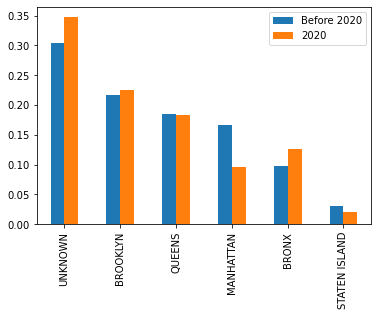

In [5]:
accidents = pd.DataFrame()
# == Compute the distribution for accidents by Borough for years before 2020 ===
accidents['Before 2020'] = before_20['BOROUGH'].value_counts()
accidents['Before 2020'] = accidents['Before 2020'] / accidents['Before 2020'] \
                           .sum()

# ====== Compute the distribution for accidents by Borough for year 2020 =======
accidents['2020'] = during_20['BOROUGH'].value_counts()
accidents['2020'] = accidents['2020'] / accidents['2020'].sum()

# Plot distributions
accidents.plot.bar()
plt.show()

## Q2
For the years before 2020, which months had the most accidents? Students in the past have said they thought there were 10% fewer accidents in February then in January. Is this true or is this bogus? Did this distribution change during 2020?

February had 7.90% fewer accidents than January.


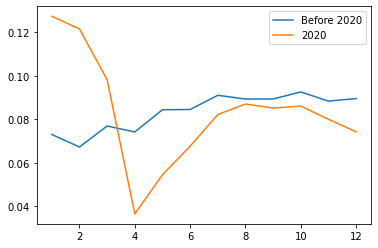

In [6]:
accidents = pd.DataFrame()
# == Compute the distribution for accidents by Borough for years before 2020 ===
accidents['Before 2020'] = before_20['CRASH DATETIME'].dt.month.value_counts()
accidents['Before 2020'] = accidents['Before 2020'] / accidents['Before 2020'] \
                           .sum()

# ====== Compute the distribution for accidents by Borough for year 2020 =======
accidents['2020'] = during_20['CRASH DATETIME'].dt.month.value_counts()
accidents['2020'] = accidents['2020'] / accidents['2020'].sum()

print('February had %.2f%% fewer accidents than January.' \
  % ((1 - (accidents['Before 2020'][2] / accidents['Before 2020'][1])) * 100))

# Stack the data
accidents = accidents.sort_index()
# Plot distributions
accidents.plot()
plt.show()

## Q3
For the years before 2020, which types of accidents were most prevalent? Did this distribution change during 2020?

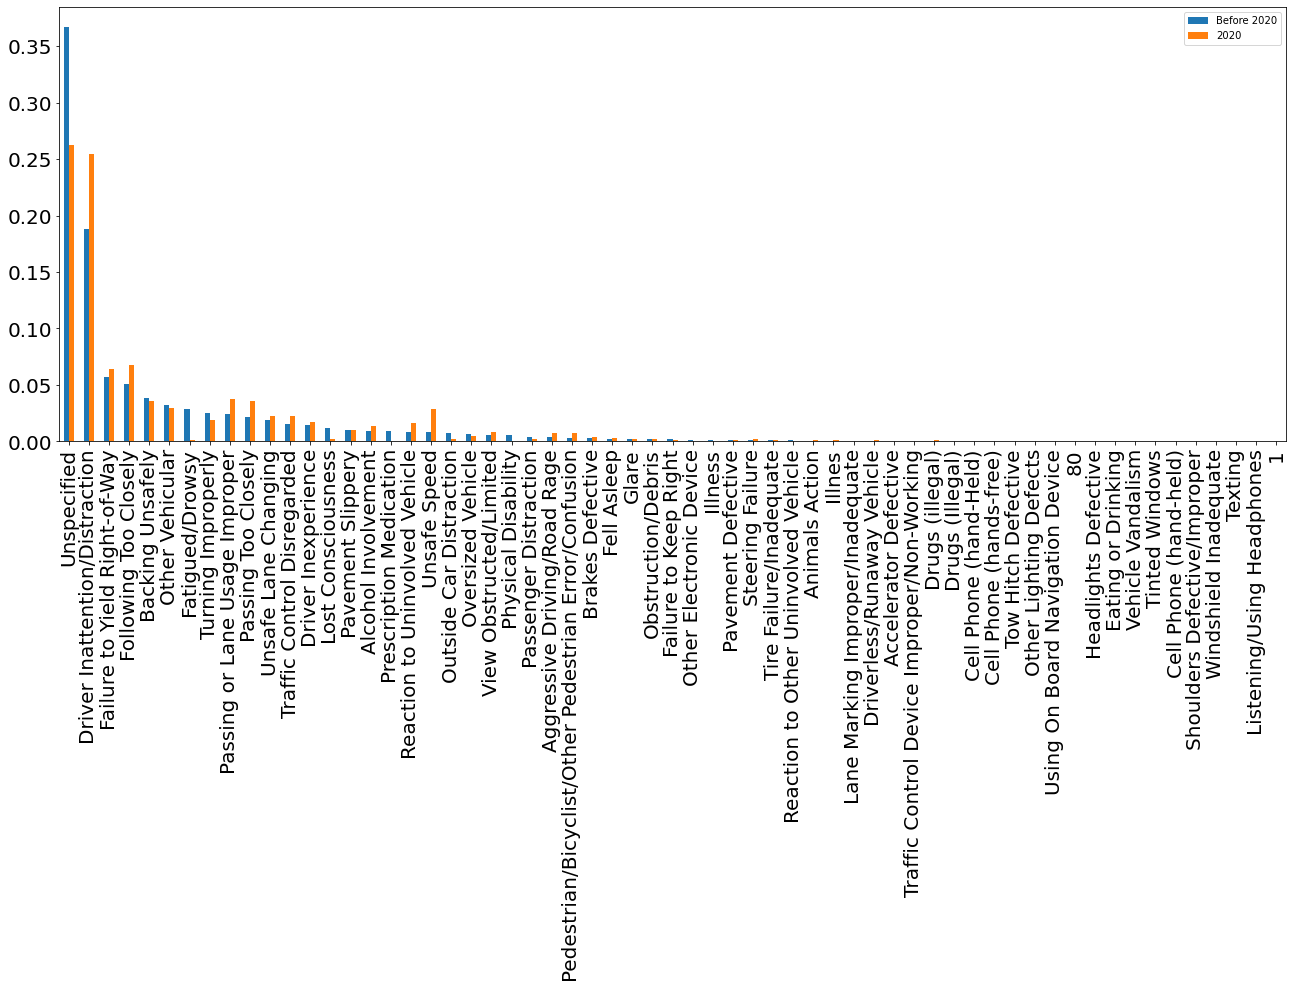

In [7]:
accidents = pd.DataFrame()
# == Compute the distribution for accidents by Borough for years before 2020 ===
accidents['Before 2020'] = before_20['CONTRIBUTING FACTOR VEHICLE 1'] \
                          .value_counts()
accidents['Before 2020'] = accidents['Before 2020'] / accidents['Before 2020'] \
                          .sum()

# ====== Compute the distribution for accidents by Borough for year 2020 =======
accidents['2020'] = during_20['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
accidents['2020'] = accidents['2020'] / accidents['2020'].sum()

# Plot distributions
accidents.plot.bar(figsize=(22,8), fontsize=20)
plt.show()

## Q4
For the years before 2020, which days of the week had the most accidents? Did this distribution change during 2020?

---------------------

Number of crashes by day before 2020:

 Sunday       11.755921
Saturday     13.279804
Monday       14.351143
Wednesday    14.712198
Tuesday      14.869746
Thursday     15.042613
Friday       15.988575

Saved the graph for No. of Crashes by Day of Week for year before 2020 to crashes_by_day_bef_20.png.


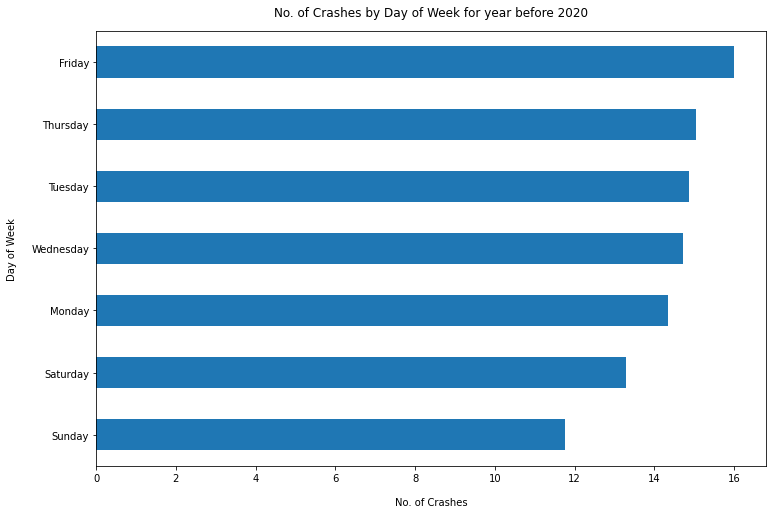

---------------------

Number of crashes by day during 2020:

 Sunday       12.251318
Monday       14.035181
Saturday     14.051132
Tuesday      14.333821
Wednesday    14.399397
Thursday     14.892995
Friday       16.036156

Saved the graph for No. of Crashes by Day of Week for year during 2020 to crashes_by_day_in_20.png.


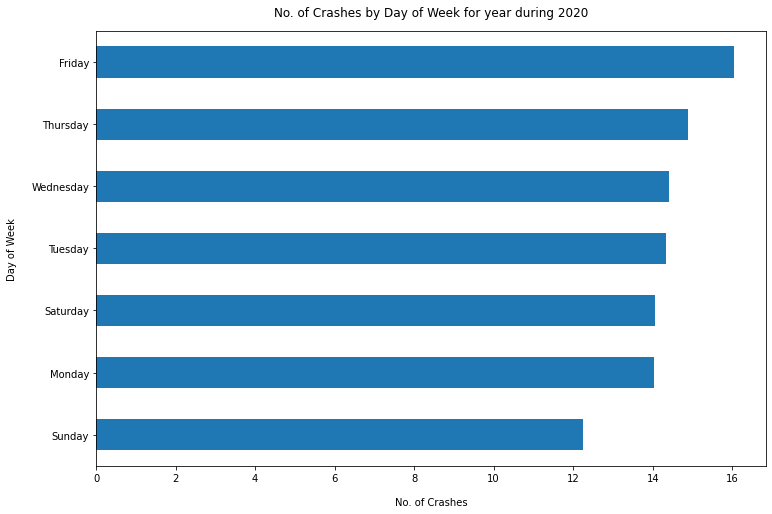

---------------------

Saved the graph for No. of Crashes by Day of Week to crashes_by_day.png.


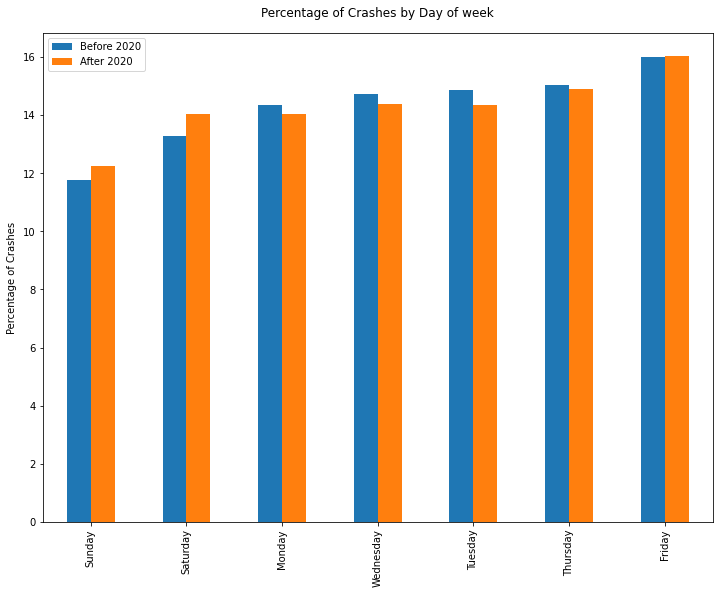

In [8]:
# introduce a column for storing day the crash took place
before_20['DAY'] = before_20['CRASH DATETIME'].dt.day_name()
during_20['DAY'] = during_20['CRASH DATETIME'].dt.day_name()

# get the total number of crashes that happened on each day
crash_day_before_20 = before_20['DAY'].value_counts(ascending=True,normalize=True)*100
crash_day_during_20 = during_20['DAY'].value_counts(ascending=True,normalize=True)*100


# plot the total number of crashes to day it took place
print('---------------------')
print('\nNumber of crashes by day before 2020:\n\n', crash_day_before_20.to_string())
crash_day_before_20.plot(kind='barh', figsize=(12, 8))
plt.xlabel("No. of Crashes", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("No. of Crashes by Day of Week for year before 2020", y=1.02)
plt.savefig('Results\crashes_by_day_bef_20.png')
print('\nSaved the graph for No. of Crashes by Day of Week for '
      'year before 2020 to crashes_by_day_bef_20.png.')
plt.show()
# plt.clf()

# plot the total number of crashes to day it took place
print('---------------------')
print('\nNumber of crashes by day during 2020:\n\n', crash_day_during_20.to_string())
crash_day_during_20.plot(kind='barh', figsize=(12, 8))
plt.xlabel("No. of Crashes", labelpad=14)
plt.ylabel("Day of Week", labelpad=14)
plt.title("No. of Crashes by Day of Week for year during 2020", y=1.02)
plt.savefig('Results\crashes_by_day_in_20.png')
print('\nSaved the graph for No. of Crashes by Day of Week for '
      'year during 2020 to crashes_by_day_in_20.png.')
plt.show()
print('---------------------')

# Stack the data
season_crashes = pd.concat([crash_day_before_20, crash_day_during_20], axis=1)

# Plot distributions
season_crashes.plot.bar(figsize=(12,9))

plt.ylabel("Percentage of Crashes", labelpad=6)
plt.title("Percentage of Crashes by Day of week", y=1.02)
plt.legend(['Before 2020','After 2020'])
plt.savefig('Results\crashes_by_day')
print('\nSaved the graph for No. of Crashes by Day of Week to crashes_by_day.png.')

## Q5
For a typical year before 2020, how given a seven day calendar that starts at 12:01 AM on Saturday and goes until 11:59 PM midnight on Sunday, when are accidents most likely to happen?  Which day of the week is most likely to have an accident?  What time of the day is most likely to have an accident. Does this change in 2020?

---------------------

Crashes that happened every hour for each day before 2020:

For  Friday 
HOUR	Crashes
 0      6930
1      3424
2      2452
3      1921
4      2295
5      2853
6      5588
7      8094
8     15401
9     14891
10    13014
11    13491
12    14293
13    14993
14    17961
15    17039
16    19533
17    19524
18    16623
19    13690
20    11307
21     9268
22     8670
23     7660
Name: HOUR, dtype: int64

For  Monday 
HOUR	Crashes
 0      5961
1      2774
2      1961
3      1608
4      1981
5      2771
6      5636
7      8234
8     15978
9     15013
10    13130
11    13159
12    13390
13    13812
14    15808
15    14998
16    18001
17    17379
18    14591
19    11324
20     8947
21     7052
22     5995
23     4691
Name: HOUR, dtype: int64

For  Saturday 
HOUR	Crashes
 0      8732
1      5682
2      4729
3      4294
4      4879
5      3997
6      3769
7      3674
8      6701
9      8031
10     9405
11    11027
12    12204
13    13267
14    14716
15    12741
16    15001
17

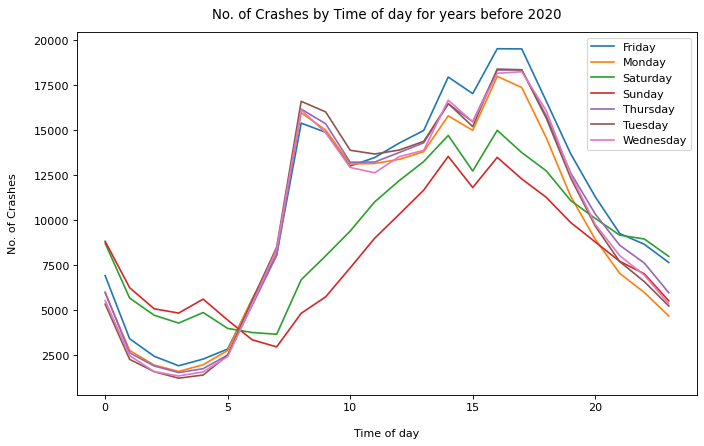

---------------------

Crashes that happened every hour for each day in 2020:

For  Friday 
HOUR	Crashes
 0      659
1      297
2      228
3      180
4      185
5      269
6      460
7      564
8      922
9      886
10     830
11     857
12     971
13    1015
14    1221
15    1139
16    1242
17    1192
18    1142
19     935
20     862
21     692
22     687
23     661
Name: HOUR, dtype: int64

For  Monday 
HOUR	Crashes
 0      632
1      322
2      206
3      161
4      183
5      220
6      443
7      582
8      828
9      821
10     815
11     843
12     898
13     978
14    1045
15    1039
16    1084
17    1073
18     987
19     758
20     590
21     518
22     444
23     368
Name: HOUR, dtype: int64

For  Saturday 
HOUR	Crashes
 0      805
1      509
2      389
3      354
4      337
5      269
6      291
7      331
8      475
9      518
10     612
11     722
12     786
13     989
14    1031
15     893
16     986
17     938
18     934
19     854
20     757
21     695
22     713
23   

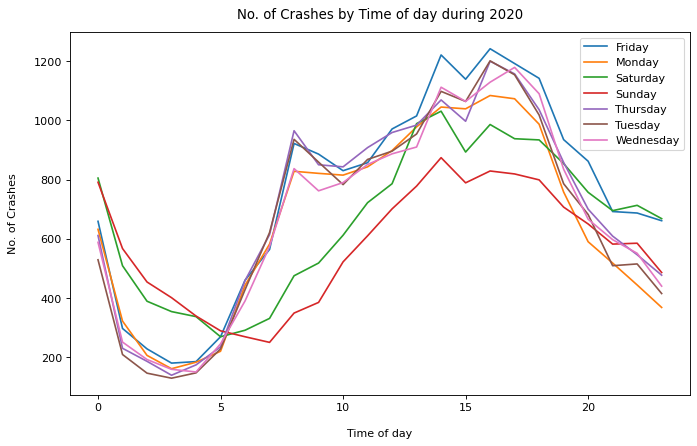

---------------------


In [9]:
# introduce a column for storing day the crash took place
before_20['DAY'] = before_20['CRASH DATETIME'].dt.day_name()
during_20['DAY'] = during_20['CRASH DATETIME'].dt.day_name()

# introduce a column for storing day the crash took place
before_20['HOUR'] = before_20['CRASH DATETIME'].dt.hour
during_20['HOUR'] = during_20['CRASH DATETIME'].dt.hour


# group the data by day value
grp_by_day_before_20 = before_20.groupby(['DAY'])
grp_by_day_during_20 = during_20.groupby(['DAY'])


# ======== Retrieve and plot data for years before 2020 ========
plt.figure(figsize=(10, 6), dpi=80)

print('---------------------')
print('\nCrashes that happened every hour for each day before 2020:')
day_list = []
for entry in grp_by_day_before_20:
    # get day of week
    day_of_week = entry[0]
    # sort the entries by hour
    this_day_crashes = entry[1].sort_values(by=['HOUR'])
    # get count of crashes that happened for every hour of day
    crashes_by_hour = this_day_crashes['HOUR'].value_counts().sort_index(ascending=True)
    print('\nFor ',day_of_week,'\nHOUR\tCrashes\n', crashes_by_hour)
    day_list.append(day_of_week)
    # plot the count of crashes that happened for every hour of day
    crashes_by_hour.plot.line()

# give labels and add legend
plt.ylabel("No. of Crashes", labelpad=14)
plt.xlabel("Time of day", labelpad=14)
plt.legend(day_list)
plt.title("No. of Crashes by Time of day for years before 2020", y=1.02)
# save the graph
plt.savefig('Results\crashes_by_time_bef_20.png')
print("Saved No. of Crashes by Time of day for years before 2020 to crashes_by_time_bef_20.png")
plt.show()
# clear plot
# plt.cla()

print('---------------------')



# ======== Retrieve and plot data for year 2020 ========
print('\nCrashes that happened every hour for each day in 2020:')
day_list = []

plt.figure(figsize=(10, 6), dpi=80)
# give labels and add legend
plt.ylabel("No. of Crashes", labelpad=14)
plt.xlabel("Time of day", labelpad=14)
plt.title("No. of Crashes by Time of day during 2020", y=1.02)

for entry in grp_by_day_during_20:
    # get day of week
    day_of_week = entry[0]
    # sort the entries by hour
    this_day_crashes = entry[1].sort_values(by=['HOUR'])
    # get count of crashes that happened for every hour of day
    crashes_by_hour = this_day_crashes['HOUR'].value_counts().sort_index(ascending=True)
    print('\nFor ',day_of_week,'\nHOUR\tCrashes\n', crashes_by_hour)
    day_list.append(day_of_week)
    # plot the count of crashes that happened for every hour of day
    crashes_by_hour.plot.line()

plt.legend(day_list)


# save the graph
plt.savefig('Results\crashes_by_time_in_20.png')
print("Saved No. of Crashes by Time of day during 2020 to crashes_by_time_in_20.png")
plt.show()
print('---------------------')


## Q6
Does the timing of when accidents happen depend on the borough of NY City? Does the amount of change vary from year to year?

---------------------

Crashes that happened every hour for each BOROUGH before 2020:

For  BRONX 
HOUR	Crashes
 0      4481
1      2325
2      1789
3      1566
4      1932
5      2052
6      3203
7      5173
8     10227
9      9122
10     7813
11     8086
12     8538
13     9161
14    10731
15     9774
16    12227
17    11532
18    10020
19     8196
20     6670
21     5591
22     4838
23     3732
Name: HOUR, dtype: int64

For  BROOKLYN 
HOUR	Crashes
 0      9631
1      5011
2      3814
3      3180
4      3663
5      3982
6      6432
7      9542
8     19518
9     19859
10    18699
11    19358
12    20646
13    21994
14    24795
15    23098
16    26642
17    25825
18    22420
19    17806
20    15125
21    12585
22    10956
23     8515
Name: HOUR, dtype: int64

For  MANHATTAN 
HOUR	Crashes
 0      9147
1      5268
2      3945
3      3287
4      3248
5      3117
6      4663
7      6056
8     12231
9     14647
10    15247
11    16019
12    16566
13    17005
14    18800
15    15872
16    18

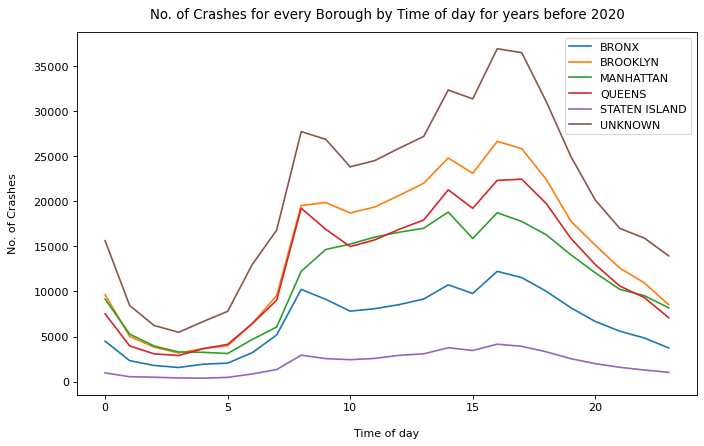

---------------------

Crashes that happened every hour for each BOROUGH in 2020:

For  BRONX 
HOUR	Crashes
 0      582
1      293
2      222
3      183
4      162
5      196
6      337
7      453
8      700
9      655
10     659
11     691
12     728
13     860
14     961
15     906
16    1005
17     998
18     875
19     747
20     664
21     526
22     490
23     399
Name: HOUR, dtype: int64

For  BROOKLYN 
HOUR	Crashes
 0     1059
1      481
2      385
3      311
4      278
5      326
6      482
7      746
8     1169
9     1117
10    1223
11    1341
12    1451
13    1537
14    1685
15    1593
16    1851
17    1759
18    1657
19    1287
20    1107
21     985
22     895
23     734
Name: HOUR, dtype: int64

For  MANHATTAN 
HOUR	Crashes
 0     373
1     218
2     153
3     138
4     142
5     140
6     248
7     344
8     542
9     563
10    558
11    644
12    688
13    635
14    704
15    692
16    697
17    685
18    618
19    520
20    469
21    390
22    376
23    308
Name: HOUR, 

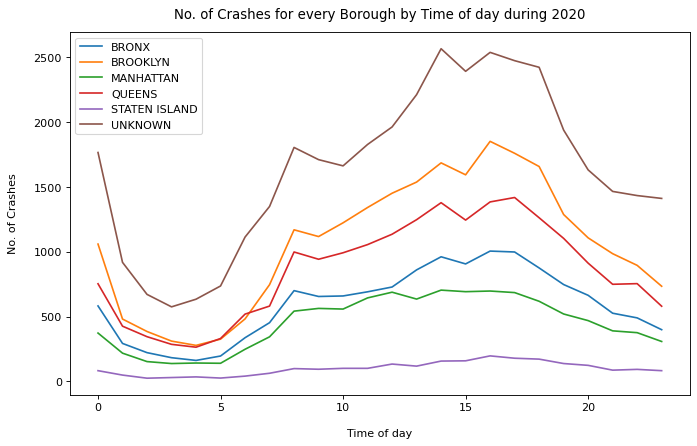

---------------------


In [10]:
# group the data by day value
grp_by_borough_before_20 = before_20.groupby(['BOROUGH'])
grp_by_borough_during_20 = during_20.groupby(['BOROUGH'])


# ======== Retrieve and plot data for years before 2020 ========

plt.figure(figsize=(10, 6), dpi=80)

print('---------------------')
print('\nCrashes that happened every hour for each BOROUGH before 2020:')
day_list = []
for entry in grp_by_borough_before_20:
    # get borough
    day_of_week = entry[0]
    # sort the entries by hour
    this_day_crashes = entry[1].sort_values(by=['HOUR'])
    # get count of crashes that happened for every hour of day in the borough
    crashes_by_hour = this_day_crashes['HOUR'].value_counts().sort_index(ascending=True)
    print('\nFor ',day_of_week,'\nHOUR\tCrashes\n', crashes_by_hour)
    day_list.append(day_of_week)
    # plot the count of crashes that happened for every hour in the borough
    crashes_by_hour.plot.line()

# give labels and add legend
plt.ylabel("No. of Crashes", labelpad=14)
plt.xlabel("Time of day", labelpad=14)
plt.legend(day_list)
plt.title("No. of Crashes for every Borough by Time of day for years before 2020", y=1.02)
# save the graph
plt.savefig('Results\crashes_by_borough_bef_20.png')
print("Saved No. of Crashes by Time of day for years before 2020 to Results\crashes_by_borough_bef_20.png")
plt.show()
# clear plot

print('---------------------')

plt.figure(figsize=(10, 6), dpi=80)


# ======== Retrieve and plot data for year 2020 ========
print('\nCrashes that happened every hour for each BOROUGH in 2020:')
day_list = []
for entry in grp_by_borough_during_20:
    # get  borough
    day_of_week = entry[0]
    # sort the entries by hour
    this_day_crashes = entry[1].sort_values(by=['HOUR'])
    # get count of crashes that happened for every hour in the borough
    crashes_by_hour = this_day_crashes['HOUR'].value_counts().sort_index(ascending=True)
    print('\nFor ',day_of_week,'\nHOUR\tCrashes\n', crashes_by_hour)
    day_list.append(day_of_week)
    # plot the count of crashes that happened for every hour of day in the borough
    crashes_by_hour.plot.line()

# give labels and add legend
plt.ylabel("No. of Crashes", labelpad=14)
plt.xlabel("Time of day", labelpad=14)
plt.legend(day_list)
plt.title("No. of Crashes for every Borough by Time of day during 2020", y=1.02)
# save the graph
plt.savefig('Results\crashes_by_borough_in_20.png')
print("Saved No. of Crashes by Time of day during 2020 to Results\crashes_by_borough_in_20.png")
plt.show()
print('---------------------')

## Q7
For the years before 2020, given the entire region of NY City, which regions are “hot spots,” or places where accidents are most likely to occur?  You will need to do some Parzen density estimation on this.  You will need to use the GPS coordinates.  You may need to convert the GPS coordinates from degrees:minutes:seconds, to degrees.fractions of degrees  (fractional degrees).  You do not need to use the Haversine distance.  Assume that longitude and latitude is Euclidean for NY City.  Create a “heat map” of where accidents occur and overlay it on a map of the city.

Do the hot spot locations change in 2020?


In [11]:
nyc = gpd.read_file(
    gplt.datasets.get_path('nyc_boroughs')
)
nyc.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


<AxesSubplot:>

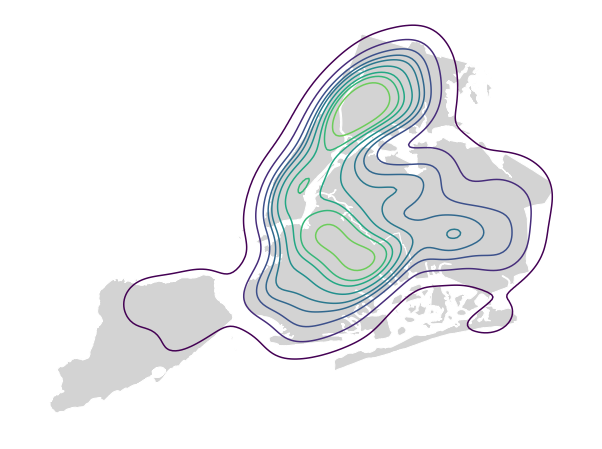

In [12]:
ax = gplt.polyplot(nyc,
                   edgecolor="white",
                   facecolor="lightgray",
                   figsize=(12, 8))
accidents = crash_data[(crash_data['LATITUDE'] != 0) & (crash_data['LONGITUDE'] != 0)]
accidents = accidents[['LATITUDE', 'LONGITUDE']].head(4000)
gdf = gpd.GeoDataFrame(
    accidents, 
    geometry=gpd.points_from_xy(accidents['LONGITUDE'], accidents['LATITUDE']))
# gdf = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))

gplt.kdeplot(gdf, ax=ax)

## Q8
Compare the number of car-only accidents (car and car or car and obstacle) with car-pedestrian accidents (car and person or car and bicycle).  Do these proportions change in 2020?  Do they change in any particular location?


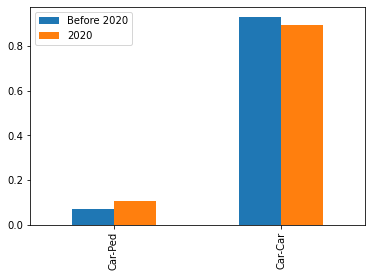

In [13]:
before_20_total = len(before_20)
before_20_car_ped = before_20[(before_20['NUMBER OF PEDESTRIANS INJURED'] > 0) \
                                 | (before_20['NUMBER OF PEDESTRIANS KILLED'] > 0) \
                                 | (before_20['NUMBER OF CYCLIST INJURED'] > 0) \
                                 | (before_20['NUMBER OF CYCLIST KILLED'] > 0)]
before_20_car_car = pd.merge( \
    before_20, \
    before_20_car_ped, \
    on=before_20.columns.tolist(), \
    how='outer', \
    indicator=True).query("_merge == 'left_only'").drop('_merge', 1)

during_20_total = len(during_20)
during_20_car_ped = during_20[(during_20['NUMBER OF PEDESTRIANS INJURED'] > 0) \
                                 | (during_20['NUMBER OF PEDESTRIANS KILLED'] > 0) \
                                 | (during_20['NUMBER OF CYCLIST INJURED'] > 0) \
                                 | (during_20['NUMBER OF CYCLIST KILLED'] > 0)]
during_20_car_car = pd.merge( \
    during_20, \
    during_20_car_ped, \
    on=during_20.columns.tolist(), \
    how='outer', \
    indicator=True).query("_merge == 'left_only'").drop('_merge', 1)

accidents = pd.DataFrame(
    {'Before 2020': [len(before_20_car_ped), len(before_20_car_car)], 
     '2020': [len(during_20_car_ped), len(during_20_car_car)] },
     index=['Car-Ped', 'Car-Car'])
accidents['Before 2020'] /= before_20_total
accidents['2020'] /= during_20_total
accidents.plot.bar()
plt.show()


In [14]:
nyc = gpd.read_file(
    gplt.datasets.get_path('nyc_boroughs')
)

In [15]:
ax = gplt.polyplot(nyc,
                   edgecolor="white",
                   facecolor="lightgray",
                   figsize=(12, 8))
accidents = before_20_car_car[(before_20_car_car['LATITUDE'] != 0) & (before_20_car_car['LONGITUDE'] != 0)]
accidents = accidents[['LATITUDE', 'LONGITUDE']].head(4000)
gdf = gpd.GeoDataFrame(
    accidents, 
    geometry=gpd.points_from_xy(accidents['LONGITUDE'], accidents['LATITUDE']))
# gdf = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))

gplt.kdeplot(gdf, ax=ax)

<AxesSubplot:>

<AxesSubplot:>

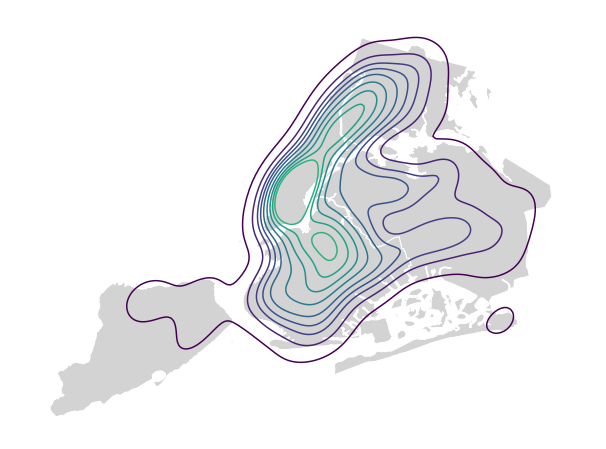

In [16]:
ax = gplt.polyplot(nyc,
                   edgecolor="white",
                   facecolor="lightgray",
                   figsize=(12, 8))
accidents = before_20_car_ped[(before_20_car_ped['LATITUDE'] != 0) & (before_20_car_ped['LONGITUDE'] != 0)]
accidents = accidents[['LATITUDE', 'LONGITUDE']].head(4000)
gdf = gpd.GeoDataFrame(
    accidents, 
    geometry=gpd.points_from_xy(accidents['LONGITUDE'], accidents['LATITUDE']))
# gdf = gpd.read_file(gplt.datasets.get_path("nyc_collision_factors"))

gplt.kdeplot(gdf, ax=ax)

## Q9
While working on the data, did you discover anything else you wanted to explore? 
Some students in the past found relationships between weather and numbers of accidents.
One team identified the surge in the number of accidents that happened after the change to/from daylight savings time.




Percentage of crashes by Season before 2020:

 Fall      27.032252
Spring    24.298847
Summer    26.955163
Winter    21.713737

Percentage of crashes by Season during 2020:

 Fall      24.021445
Spring    15.866897
Summer    25.425141
Winter    34.686517

Percentage of Crashes during Fall season:
UNKNOWN          30.741610
BROOKLYN         21.446043
QUEENS           18.719893
MANHATTAN        16.604214
BRONX             9.454475
STATEN ISLAND     3.033765

Percentage of Crashes during Spring season:
UNKNOWN          30.549090
BROOKLYN         21.717705
QUEENS           18.216574
MANHATTAN        16.811129
BRONX             9.782134
STATEN ISLAND     2.923368

Percentage of Crashes during Summer season:
UNKNOWN          30.720406
BROOKLYN         21.444858
QUEENS           18.404690
MANHATTAN        16.906544
BRONX             9.670885
STATEN ISLAND     2.852616

Percentage of Crashes during Winter season:
UNKNOWN          29.388192
BROOKLYN         22.024423
QUEENS           19.006161

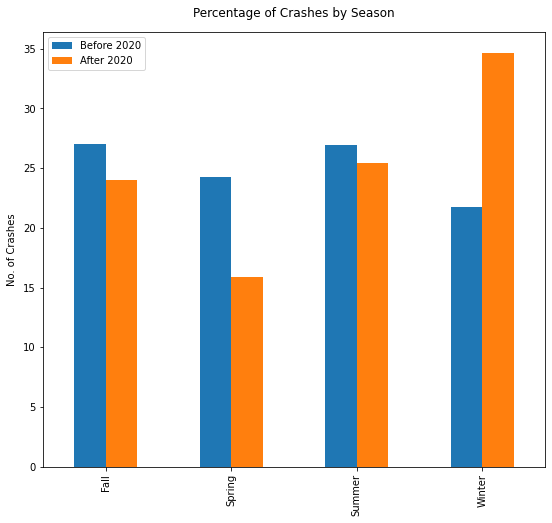

In [17]:
# introduce a column for storing month the crash took place
before_20['MONTH'] = before_20['CRASH DATETIME'].dt.month
during_20['MONTH'] = during_20['CRASH DATETIME'].dt.month

# introduce a column for storing season the crash took place
before_20['SEASON'] = before_20["MONTH"].apply(lambda month: ["Winter","Spring","Summer","Fall"][(month-1)//3])
during_20['SEASON'] = during_20["MONTH"].apply(lambda month: ["Winter","Spring","Summer","Fall"][(month-1)//3])


# get the total number of crashes that happened in each season
crash_season_before_20 = before_20['SEASON'].value_counts(normalize=True) * 100
crash_season_during_20 = during_20['SEASON'].value_counts(normalize=True) * 100

crash_season_before_20.sort_index(inplace=True)
crash_season_during_20.sort_index(inplace=True)

# group crashes by season
grp_by_season_before_20 = before_20.groupby(['SEASON'])
grp_by_season_in_20 = during_20.groupby(['SEASON'])


print('\nPercentage of crashes by Season before 2020:\n\n', crash_season_before_20.to_string())
print('\nPercentage of crashes by Season during 2020:\n\n', crash_season_during_20.to_string())

for season_data in grp_by_season_before_20:
    # get season
    season = season_data[0]
    # sort the entries by month
    this_season_crashes = season_data[1].sort_values(by=['MONTH'])
    crash_by_boroughs = this_season_crashes['BOROUGH'].value_counts(normalize=True)*100
    print('\nPercentage of Crashes during %s season:'%season)
    print(crash_by_boroughs.to_string())

for season_data in grp_by_season_in_20:
    # get  season
    season = season_data[0]
    # sort the entries by month
    this_season_crashes = season_data[1].sort_values(by=['MONTH'])
    crash_by_boroughs = this_season_crashes['BOROUGH'].value_counts(normalize=True)*100
    print('\nPercentage of Crashes during %s season:'%season)
    print(crash_by_boroughs.to_string())




# ======== Retrieve and plot data  ========

print('---------------------')

# Stack the data
season_crashes = pd.concat([crash_season_before_20, crash_season_during_20], axis=1)

# Plot distributions
season_crashes.plot.bar(figsize=(9,8))

plt.ylabel("No. of Crashes", labelpad=6)
plt.title("Percentage of Crashes by Season", y=1.02)
plt.legend(['Before 2020','After 2020'])

plt.savefig('Results\crashes_by_season.png')

print('\nSaved the graph for Percentage of Crashes by Season of Week for '
      'year before 2020 to crashes_by_season.png.')
# plt.show()

print('---------------------\n')




## Q10
Suppose I tell you that there is an accident in one of these certain locations:\
a.	Hope, or \
b.	Hunts Point, or \
c.	Central Brooklyn, \
d.	Brairwood, or \
e.	West Bronx

what else can you tell me about that accident just by the location – even before  we dispatch emergency vehicles?  How would you build a classifier for this?  Is it likely to be a car-car, or car-pedestrian, or car-bicycle?




In [18]:
# a. Hope,                
# b. Hunts Point          40.813°N 73.884°W
# c. Central Brooklyn     40.697°N 73.917°W
# d. Brairwood            40.71°N 73.81°W
# e. West Bronx           40.850°N 73.900°W



crash_data_total = len(crash_data)

crash_data_car_other = crash_data[(crash_data['NUMBER OF PEDESTRIANS INJURED'] > 0) \
                                 | (crash_data['NUMBER OF PEDESTRIANS KILLED'] > 0)\
                                 | (crash_data['NUMBER OF CYCLIST INJURED'] > 0) \
                                 | (crash_data['NUMBER OF CYCLIST KILLED'] > 0)\
                                 | (crash_data['NUMBER OF MOTORIST INJURED'] > 0)\
                                 | (crash_data['NUMBER OF MOTORIST INJURED'] > 0)]

crash_data_car_ped = crash_data[(crash_data['NUMBER OF PEDESTRIANS INJURED'] > 0) \
                                 | (crash_data['NUMBER OF PEDESTRIANS KILLED'] > 0)]

crash_data_car_bike = crash_data[(crash_data['NUMBER OF CYCLIST INJURED'] > 0) \
                                 | (crash_data['NUMBER OF CYCLIST KILLED'] > 0)]

crash_data_car_motorist = crash_data[(crash_data['NUMBER OF MOTORIST INJURED'] > 0) \
                                 | (crash_data['NUMBER OF MOTORIST KILLED'] > 0)]
                                 
crash_data_car_car = pd.merge( \
    crash_data, \
    crash_data_car_other, \
    on=crash_data.columns.tolist(), \
    how='outer', \
    indicator=True).query("_merge == 'left_only'").drop('_merge', 1)

In [19]:
# get the percentage of car-car crashes happened in each borough
car_car_by_boroughs = crash_data_car_car['BOROUGH'].value_counts()
car_car_by_boroughs.sort_index(inplace=True)
print("Percentage of car-car crashes happened in each borough:\n",car_car_by_boroughs)

# get the percentage of car-ped crashes happened in each borough
car_ped_by_boroughs = crash_data_car_ped['BOROUGH'].value_counts()
car_ped_by_boroughs.sort_index(inplace=True)
print("Percentage of car-ped crashes happened in each borough:\n",car_ped_by_boroughs)

# get the percentage of car-bike crashes happened in each borough
car_bike_by_boroughs = crash_data_car_bike['BOROUGH'].value_counts()
car_bike_by_boroughs.sort_index(inplace=True)
print("Percentage of car-bike crashes happened in each borough:\n",car_bike_by_boroughs)

# get the percentage of car-bike crashes happened in each borough
car_motorist_by_boroughs = crash_data_car_motorist['BOROUGH'].value_counts()
car_motorist_by_boroughs.sort_index(inplace=True)
print("Percentage of car-motorist crashes happened in each borough:\n",car_motorist_by_boroughs)



Percentage of car-car crashes happened in each borough:
 BRONX            138239
BROOKLYN         298742
MANHATTAN        241413
QUEENS           262146
STATEN ISLAND     42131
UNKNOWN          428540
Name: BOROUGH, dtype: int64
Percentage of car-ped crashes happened in each borough:
 BRONX            11657
BROOKLYN         24220
MANHATTAN        16902
QUEENS           16702
STATEN ISLAND     1938
UNKNOWN          16912
Name: BOROUGH, dtype: int64
Percentage of car-bike crashes happened in each borough:
 BRONX             3243
BROOKLYN         12548
MANHATTAN         9226
QUEENS            6258
STATEN ISLAND      364
UNKNOWN           8515
Name: BOROUGH, dtype: int64
Percentage of car-motorist crashes happened in each borough:
 BRONX            22915
BROOKLYN         48849
MANHATTAN        17574
QUEENS           42981
STATEN ISLAND     7479
UNKNOWN          89640
Name: BOROUGH, dtype: int64


---------------------
No. of car_car Crashes in every Borough:
 BRONX            138239
BROOKLYN         298742
MANHATTAN        241413
QUEENS           262146
STATEN ISLAND     42131
UNKNOWN          428540
Name: BOROUGH, dtype: int64

Saved No. of car_car Crashes for every Borough to car_car_by_borough.png


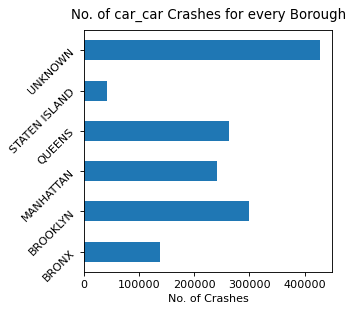

---------------------
---------------------
No. of car_ped Crashes in every Borough:
 BRONX            11657
BROOKLYN         24220
MANHATTAN        16902
QUEENS           16702
STATEN ISLAND     1938
UNKNOWN          16912
Name: BOROUGH, dtype: int64

Saved No. of car_ped Crashes for every Borough to car_ped_by_borough.png


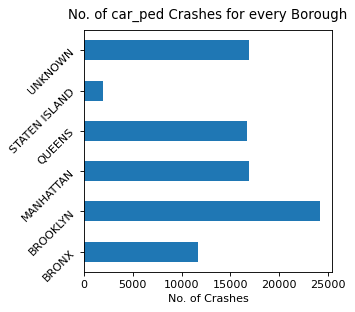

---------------------
---------------------
No. of car_bike Crashes in every Borough:
 BRONX             3243
BROOKLYN         12548
MANHATTAN         9226
QUEENS            6258
STATEN ISLAND      364
UNKNOWN           8515
Name: BOROUGH, dtype: int64

Saved No. of car_bike Crashes for every Borough to car_bike_by_borough.png


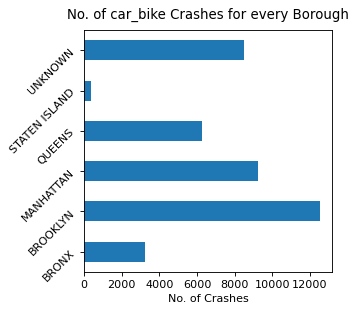

---------------------
---------------------
No. of car_motorist Crashes in every Borough:
 BRONX            22915
BROOKLYN         48849
MANHATTAN        17574
QUEENS           42981
STATEN ISLAND     7479
UNKNOWN          89640
Name: BOROUGH, dtype: int64

Saved No. of car_motorist Crashes for every Borough to car_motorist_by_borough.png


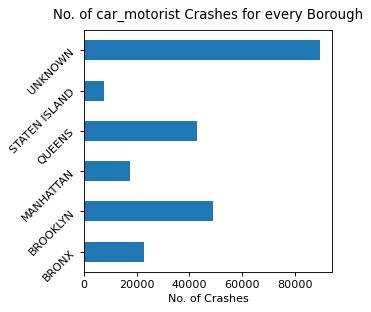

---------------------


In [20]:
def plot_type_of_crashes(crashes_by_borough,type):
    # ======== Retrieve and plot data ========
    plt.figure(figsize=(4, 4), dpi=80)

    print('---------------------')
    print("No. of "+type+" Crashes in every Borough:\n",crashes_by_borough)

    crashes_by_borough.plot.barh()

    # give labels and add legend
    plt.xlabel("No. of Crashes", labelpad=4)
    plt.yticks(rotation=45)
    # plt.xlim(0,40)
    # plt.ylabel("Borough", labelpad=4)
    plt.title("No. of "+type+" Crashes for every Borough", y=1.02)

    # save the graph
    plt.savefig('Results\\'+type+"_by_borough.png")
    print("\nSaved No. of "+type+" Crashes for every Borough to "+type+"_by_borough.png")
    plt.show()
    print('---------------------')


plot_type_of_crashes(car_car_by_boroughs,'car_car')
plot_type_of_crashes(car_ped_by_boroughs,'car_ped')
plot_type_of_crashes(car_bike_by_boroughs,'car_bike')
plot_type_of_crashes(car_motorist_by_boroughs,'car_motorist')

---------------------
[138239, 11657, 3243, 22915]
['Car-Car', 'Car-Ped', 'Car-Bike', 'Car-Motorist']
BRONX
               count
Car-Car       138239
Car-Ped        11657
Car-Bike        3243
Car-Motorist   22915
Saved No. of Crashes by BRONX_crash_types.png


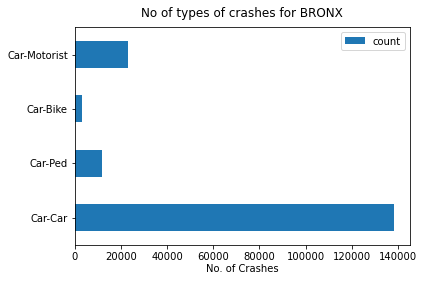

---------------------
---------------------
[298742, 24220, 12548, 48849]
['Car-Car', 'Car-Ped', 'Car-Bike', 'Car-Motorist']
BROOKLYN
               count
Car-Car       298742
Car-Ped        24220
Car-Bike       12548
Car-Motorist   48849
Saved No. of Crashes by BROOKLYN_crash_types.png


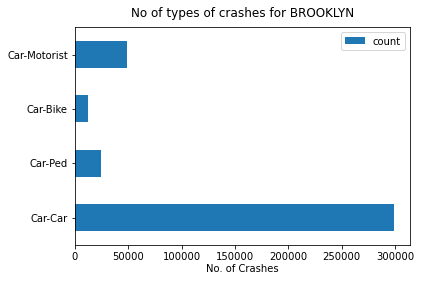

---------------------
---------------------
[241413, 16902, 9226, 17574]
['Car-Car', 'Car-Ped', 'Car-Bike', 'Car-Motorist']
MANHATTAN
               count
Car-Car       241413
Car-Ped        16902
Car-Bike        9226
Car-Motorist   17574
Saved No. of Crashes by MANHATTAN_crash_types.png


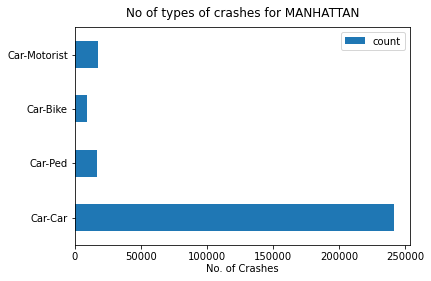

---------------------
---------------------
[262146, 16702, 6258, 42981]
['Car-Car', 'Car-Ped', 'Car-Bike', 'Car-Motorist']
QUEENS
               count
Car-Car       262146
Car-Ped        16702
Car-Bike        6258
Car-Motorist   42981
Saved No. of Crashes by QUEENS_crash_types.png


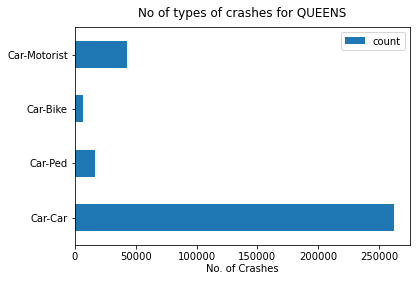

---------------------
---------------------
[42131, 1938, 364, 7479]
['Car-Car', 'Car-Ped', 'Car-Bike', 'Car-Motorist']
STATEN ISLAND
              count
Car-Car       42131
Car-Ped        1938
Car-Bike        364
Car-Motorist   7479
Saved No. of Crashes by STATEN ISLAND_crash_types.png


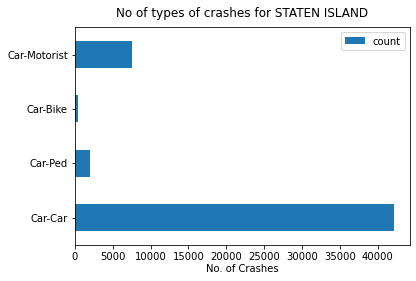

---------------------
---------------------
[428540, 16912, 8515, 89640]
['Car-Car', 'Car-Ped', 'Car-Bike', 'Car-Motorist']
UNKNOWN
               count
Car-Car       428540
Car-Ped        16912
Car-Bike        8515
Car-Motorist   89640
Saved No. of Crashes by UNKNOWN_crash_types.png


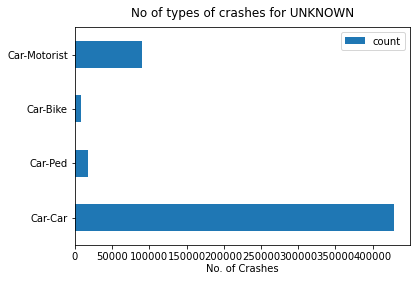

---------------------


In [21]:
grp_by_borough = crash_data.groupby(['BOROUGH'])

cols = ['Car-Car','Car-Ped','Car-Bike','Car-Motorist']
for entry in grp_by_borough:
    
    borough = entry[0]
    data = entry[1]

    car_other = data[ (data['NUMBER OF PEDESTRIANS INJURED'] > 0) \
                  | (data['NUMBER OF PEDESTRIANS KILLED'] > 0)\
                  | (data['NUMBER OF CYCLIST INJURED'] > 0) \
                  | (data['NUMBER OF CYCLIST KILLED'] > 0)\
                  | (data['NUMBER OF MOTORIST INJURED'] > 0)\
                  | (data['NUMBER OF MOTORIST INJURED'] > 0)]

    car_ped = data[(data['NUMBER OF PEDESTRIANS INJURED'] > 0) \
               | (data['NUMBER OF PEDESTRIANS KILLED'] > 0)]

    car_bike = data[(data['NUMBER OF CYCLIST INJURED'] > 0) \
                | (data['NUMBER OF CYCLIST KILLED'] > 0)]

    car_motorist = data[(data['NUMBER OF MOTORIST INJURED'] > 0) \
                    | (data['NUMBER OF MOTORIST KILLED'] > 0)]

    car_car = pd.merge( \
      data, \
      car_other, \
      on=data.columns.tolist(), \
      how='outer', \
      indicator=True).query("_merge == 'left_only'").drop('_merge', 1)


    print('---------------------')

    types = [len(car_car),len(car_ped),len(car_bike),len(car_motorist)]
    print(types)
    print(cols)
    # df = pd.DataFrame({'Count': types,'Crash Type': cols, })
    df = pd.DataFrame(types, index = cols, columns = ['count'])
    df.plot.barh()

    print(borough)
    print(df)
    # plt.figure(figsize=(10, 6), dpi=80)
    # # ======== Retrieve and plot data for year 2020 ========

    # plt.plot
    # # give labels and add legend
    plt.xlabel("No. of Crashes", labelpad=2)
    # plt.ylabel("Type of crashes", labelpad=2)

    plt.title("No of types of crashes for "+borough, y=1.02)
    # save the graph
    plt.savefig('Results\\'+borough+'_crash_types.png')
    print("Saved No. of Crashes by "+borough+"_crash_types.png")
    plt.show()
    print('---------------------')
